<a href="https://colab.research.google.com/github/mangoubi/DS595-ST-Machine-Learning-for-Engineering-Science-Applications/blob/main/CaseStudy_2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lithium-ion Batteries

This case study is based upon the excellent example below:

https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Physical and chemical properties of the Lithium-ion silicate cathodes are used to predict the crystal structure of a Lithium-ion battery material as monoclinic, orthorhombic and triclinic. This case study demonstrates how feature engineering improves the classification results.

![](http://cdn.pixabay.com/photo/2020/01/28/15/18/battery-4800010_960_720.jpg)

**Background:** [Lithium-ion batteries](https://en.wikipedia.org/wiki/Lithium-ion_battery) are commonly used for portable electronics, electric vehicles, and aerospace applications. During discharge, Lithium ions move from the negative electrode through an electrolyte to the positive electrode to create a voltage and current. During recharging, the ions migrate back to the negative electrode. The crystal structure (monoclinic, orthorhombic, triclinic) is available for 339 different chemicals that contain lithium. Available properties are:

| Label | Description |
|------|------|
|   Materials Id  | Unique ID of the material from materialsproject.org |
|   Formula  | Chemical formula of the compound |
|   Space group  | Symmetry group of a three-dimensional crystal pattern |
|   Formation Energy (eV)  | Energy required to produce the material from standard elements |
|   E Above Hull (eV)  | Energy released if compound is decomposed into the most stable compounds |
|   Band Gap (eV)  | Energy range in a solid where no electronic states can exist. A larger band gap indicates that the compound is worse at conducting electricity or heat. |
|   Nsites  | Number of atoms in the unit cell of the crystal |
|   Density (gm/cc)  | Mass per volume of bulk crystalline materials |
|   Volume  | Unit cell volume of the material |
|   Has Bandstructure  | Boolean (True / False) variable for bandstructure |

**Objective:** Predict the crystal structure type (monoclinic, orthorhombic, triclinic) from Lithium-ion physical and chemical compound information.


**References**

Hedengren, J. D. (2021, December 16). Lithium-ion Batteries, Machine Learning for Engineers. Retrieved from https://apmonitor.com/pds/index.php/Main/LithiumIonBatteries

### Import Polymer MFR Data


In [1]:
# install package
# using for variable encoding

try:
    import chemparse
except:
    !pip install chemparse
    print('May need to restart kernel to use chemparse')

May need to restart kernel to use chemparse


Similar to case study 1, the data can be accessed directly by url.

In [2]:
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/lithium_ion.txt'
data = pd.read_csv(url)
data.sample(20)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
225,mp-762686,LiFeSiO4,Pna21,-2.544,0.078,2.380,28,2.872,358.225,True,orthorhombic
219,mp-773468,LiFeSiO4,Imma,-2.546,0.076,1.311,14,3.898,131.954,True,orthorhombic
244,mp-763492,Li3CoSiO5,P21nb,-2.418,0.033,1.176,40,2.941,424.186,True,orthorhombic
290,mp-761402,Li2Fe5(Si2O7)2,P1,-2.563,0.031,0.000,25,3.492,299.319,True,triclinic
321,mp-762704,Li4Fe(SiO4)2,P1,-2.543,0.089,0.232,15,2.781,159.895,False,triclinic
48,mp-764348,LiFeSiO4,P21/c,-2.601,0.020,2.904,28,2.873,358.057,True,monoclinic
142,mp-775454,Li2MnSiO4,Pna21,-2.694,0.011,2.880,32,2.957,361.437,True,orthorhombic
298,mp-763810,Li17Fe6(Si2O7)6,P1,-2.691,0.046,0.000,77,2.868,846.546,False,triclinic
77,mp-767838,LiFeSiO4,P21,-2.560,0.062,2.727,28,2.889,356.057,True,monoclinic
177,mp-764346,Li2FeSiO4,P21cn,-2.621,0.005,2.993,32,3.065,350.604,True,orthorhombic


Still remember the ValueError we met in Case Study 1? Because we forgot to check if there are any null values in the dataset.

This time, let's do check that first.

![](https://i.pinimg.com/originals/05/ba/0a/05ba0af7235165ec94078d0d6661047f.jpg)

**Recall:**

data.isnull() is used to check if there is null value in the dataset. We can sum them by using sum().

data.info() and data.describe() are usually used to check the properties and basic statistics of the data.

In [3]:
data.isnull().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [5]:
data.describe()

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,-2.616950,0.058215,2.079740,38.837758,2.984003,467.765619
std,0.183809,0.030363,1.087968,23.133142,0.353968,292.674559
min,-2.985000,0.000000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,0.035500,1.265500,26.000000,2.760500,286.381500
50%,-2.605000,0.062000,2.499000,31.000000,2.947000,358.537000
75%,-2.525500,0.081500,2.968000,52.000000,3.106000,601.696500
max,-2.012000,0.190000,3.823000,132.000000,4.201000,1518.850000


Great!!! This dataset does not contain any null values. 🙂 Let's start modeling.

# Naive solution

### Classification Modeling
What is the first step? Splitting the training and test set right?

**Recall:**
The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Not sure which column could be a useful feature? Let's start with the naive solution use them all first, except for `Materials Id`, since `Materials Id` is not important in this case.

**Features：**Formula	Spacegroup, Formation Energy (eV), 	E Above Hull (eV), 	Band Gap (eV), 	Nsites, 	Density (gm/cc), 	Volume, 	Has Bandstructure

**label：** Crystal System

In [7]:
from sklearn.tree import DecisionTreeClassifier
method = DecisionTreeClassifier()

In [8]:
model = method.fit(train[['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure']].to_numpy(),train['Crystal System'].to_numpy())

ValueError: could not convert string to float: 'Li4Fe2SiO7'

ValueError: could not convert string to float: 'Li4Fe2SiO7'????

![?](https://www.mememaker.net/static/images/memes/4379873.jpg)

What is 'Li4Fe2SiO7'? It looks like a Formula. Why we neet to convert it to float?

Wow! Our model can not handle the string information directly, so we need to convert it to value. Let's check their data type first.


`dtypes` is used to check data's type.

In [9]:
data.dtypes

,0
Materials Id,object
Formula,object
Spacegroup,object
Formation Energy (eV),float64
E Above Hull (eV),float64
Band Gap (eV),float64
Nsites,int64
Density (gm/cc),float64
Volume,float64
Has Bandstructure,bool


It turns out that we need to distinguish the types of variables first. 👀

## **Question 1** **(15 points)**

**Part 1 (5 points)**

What is the differnce between real-valued, ordinal and categorical variables?

**Part 2 (5 points)**  

Why does it matter whether a variable is real-valued, ordinal or categorical? Give an example, and explain why it matters for this example.

**Part 3 (5 points)**  

Identify the data types of the following variables in the dataset:

`Materials Id`              
`Formula`                  
`Spacegroup`                
`Formation Energy (eV)`    
`E Above Hull (eV)`        
`Band Gap (eV)`            
`Nsites`                     
`Density (gm/cc)`          
`Volume`                   
`Has Bandstructure`           
`Crystal System`            

Hint:
Review class notes that can be found on Canvas.

In [ ]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

In [10]:
# Separate into numerical features that don't need preprocessing, and categorical features that need to be transformed
num_feat = data.select_dtypes(include=['int64','float64']).columns
cat_feat = data.select_dtypes(include=['object','bool']).columns

In [11]:
num_feat

Index(['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites',
       'Density (gm/cc)', 'Volume'],
      dtype='object')

In [12]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

Still remember how to use heatmap and pair plot to show the correlation between variables? Let's discover the correlation of all numerical variables.

**Recall:**

sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)

sns.pairplot(data)




In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

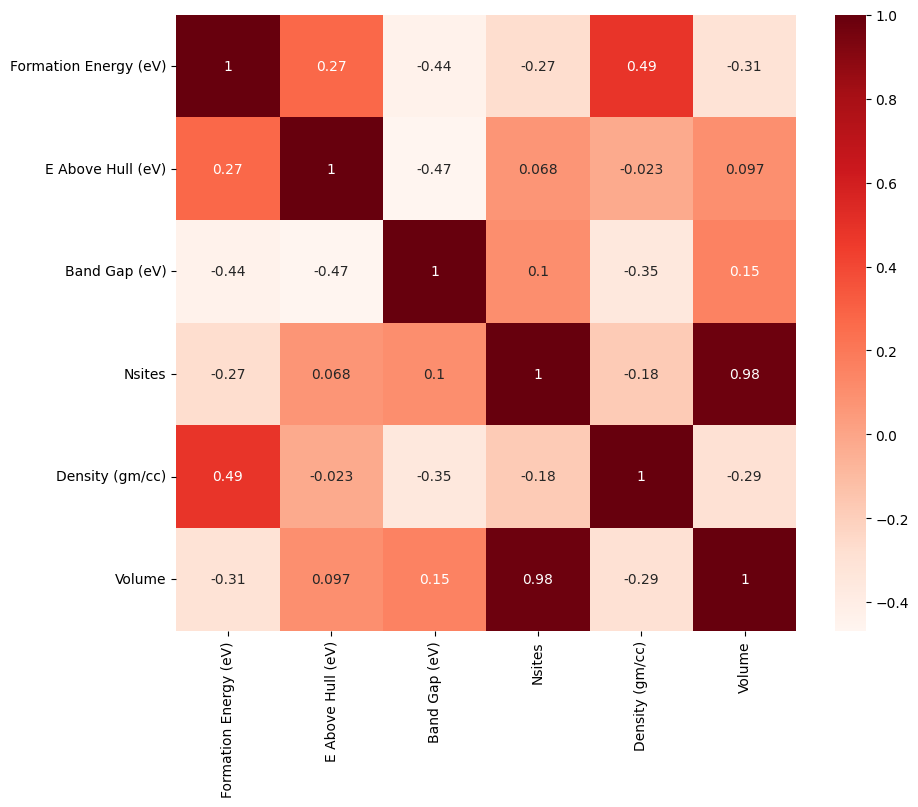

In [14]:
plt.figure(figsize=(10,8))
cor = data[num_feat].corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

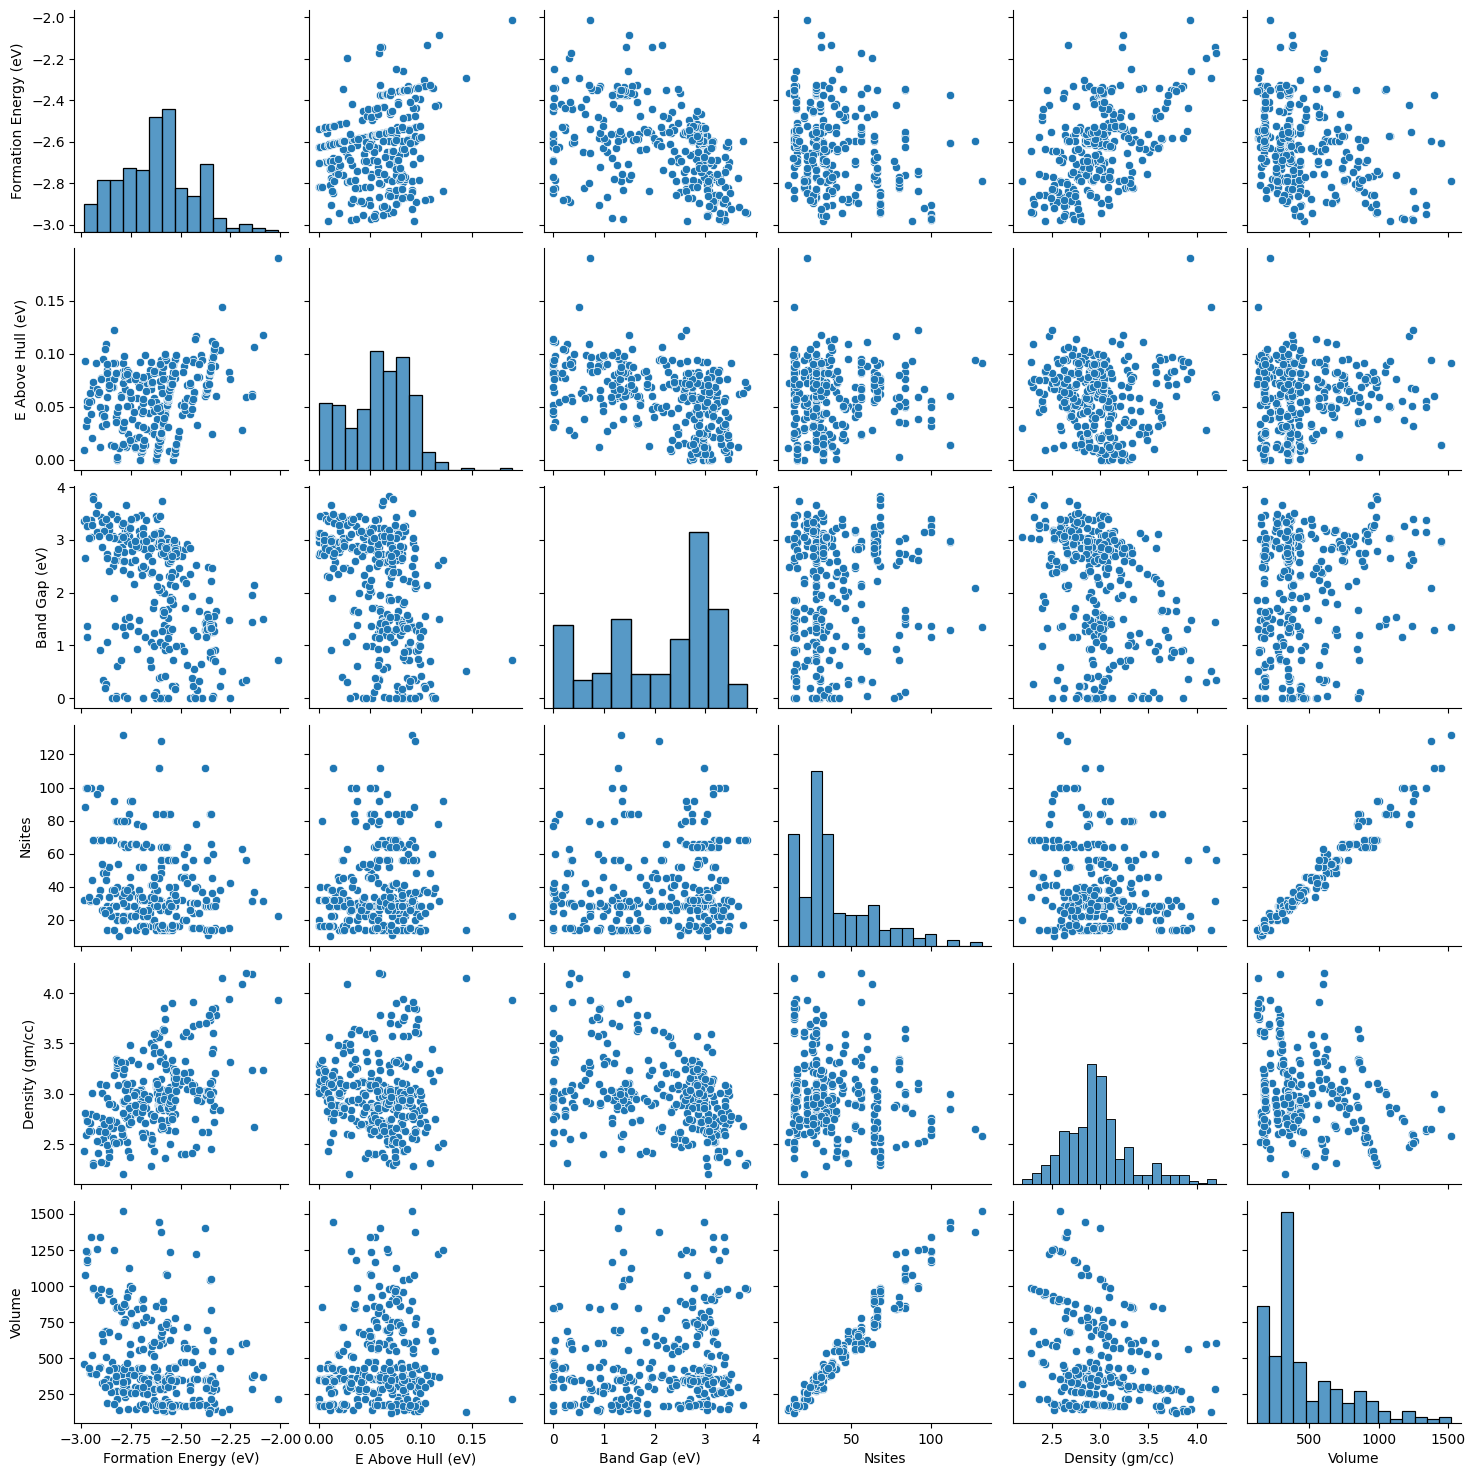

In [15]:
sns.pairplot(data[num_feat])

## **Question 2** **(15 points)**

**Part 1** (5 points)
Find the two **most** positively correlated variables. Why do you think they are relevant for predicting one variable based on the other variable?

**Part 2** (5 points)
Find the two **least** correlated variables (i.e., the two variables with correlation closest to 0) . Why do you think they are **not** relevant for predicting one variable based on the other variable?

**Part 3** (5 points)
What about negative correlations?  Are two variables that are very negatively correlated predictable from each other?


In [9]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

Okay, now I know which variables are numerical and which are categorical. Since categorical ones bring ValueErrors, can we just use numerical ones? Let's give it a try.

In [16]:
method = DecisionTreeClassifier()
model = method.fit(train[num_feat].to_numpy(),train['Crystal System'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [18]:
predicted_label=model.predict(test[num_feat].to_numpy())
groundtruth_label=test['Crystal System'].to_numpy()

accuracy=accuracy_score(predicted_label,groundtruth_label)

macro_precision=precision_score(predicted_label,groundtruth_label,average='macro')
micro_precision=precision_score(predicted_label,groundtruth_label,average='micro')

macro_recall=recall_score(predicted_label,groundtruth_label,average='macro')
micro_recall=recall_score(predicted_label,groundtruth_label,average='micro')

macro_f1=f1_score(predicted_label,groundtruth_label,average='macro')
micro_f1=f1_score(predicted_label,groundtruth_label,average='micro')

from tabulate import tabulate
results = [
["accuracy", accuracy],
["macro_precision", macro_precision],
["micro_precision",micro_precision],
["macro_recall",macro_recall],
["micro_recall",micro_recall],
["macro_f1",macro_f1],
["micro_f1",micro_f1],
]
print (tabulate(results, headers=["Metrics", "Values"]))

Metrics            Values
---------------  --------
accuracy         0.544118
macro_precision  0.532347
micro_precision  0.544118
macro_recall     0.542392
micro_recall     0.544118
macro_f1         0.535525
micro_f1         0.544118


Ok, we already see things are interesting. There are several different metrics (accuracy, precision, recall, f1)! Hmmm....

Here is a great tutorial to help you out.

https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/#:~:text=Macro%20average%20deals%20with%20aggregates%20or%20totals%2C%20macro,price%20levels%2C%20and%20gross%20domestic%20product%20or%20GDP.

Part of this class is learning to be able to use outside resources to learn more about these topics.  Here is a chance to get some practice 😀

## **Question 3** **(10 points)**

**Part 1 (5 points)**

What do **original (binary)** accuracy, precision, recall and f1 mean? How are they counted?

**Part 2 (5 points)**  

What do **macro/micro** precision, recall and f1 mean? How are they counted? Why do we use macro/micro metrics here instead of original binary ones?


In [ ]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

# Solution with Feature Engineering

![?](https://www.mememaker.net/static/images/memes/4751028.jpg)

Notice that you dropped all the categorical variables. Are these variables really not useful for classification? Let's encode these variables to allow them to be fit into the model. Then, we can see if they can impact the performance of the task.

### Categorical encoding methods
<a id='Categorical_encoding_methods'></a>

#### 1. One Hot Encoding
Method: Encode each category value into a binary vector, with size = # of distinct values. See https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

Example: Has Bandstructure column has 2 distinct values, True and False. Create a new column where 1 = True and 0 = False.

Pros: simple and rugged method to get categorical features into unique and useful numerical features

Cons: m unique values results in m unique new features. This is fine when there are only 2-3 unique values (such as hi/lo, yes/no), but creates issues when there are more. Can't handle new categories that weren't in training data, and easily overfit. Sparse data.

#### 2. Encode to ordinal variables
Method: assign each unique value to a unique number.

Example: Spacegroup = Pc is assigned to 0, Spacegroup = P21/c is assigned to 1, etc.

Pros: simple and quick, 1 column in -> 1 column out

Cons: residual "structure" (number assigned is arbitrary, and it leads algorithms to assume that a Spacegroup with a value of 20 is higher value than a Spacegroup of value 1)

#### 3. Feature Hashing
Method: Encode each unique category into a non-binary vector

Example: Spacegroup = Pc is assigned to [1,0,0], Spacegroup = P21/c is assigned to [1,2,-1], etc. Specify number of columns (length of vector)

Pros: low dimensionality so really efficient.

Cons: potential collisions (for example the 1st value in example has both Spacegroups sharing a '1'); hashed features aren't interpretable so can't be used in feature importance. **How do you come up with hashes to preserve distances!?**

#### 4. Other methods
Primarily involve prior knowledge about dataset. Encode with own algorithm to include closely related features.

Variation on One Hot Encoding for large numbers of unique values: classify infrequent instances into "rare" category. May lose some granularity and important info, but also allows for new categories that aren't in training data

Now, let's explore categorical variables one by one.

In [19]:
cat_feat

Index(['Materials Id', 'Formula', 'Spacegroup', 'Has Bandstructure',
       'Crystal System'],
      dtype='object')

### `'Materials Id'` column

In [20]:
data['Materials Id'].describe()

,Materials Id
count,339
unique,339
top,mp-849394
freq,1


339 unique values for 339 unique entries; there is no useful information in this column and it can be dropped.

## **Question 4** **(5 points)**

Why can this column be dropped?  I.e., why is a column with all different categorical values (and no prior information) not useful?



In [21]:
data.drop(columns=['Materials Id'],inplace=True)
data.columns

Index(['Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)',
       'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume',
       'Has Bandstructure', 'Crystal System'],
      dtype='object')

In [ ]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

### `'Has Bandstructure'` column

<Axes: xlabel='Has Bandstructure'>

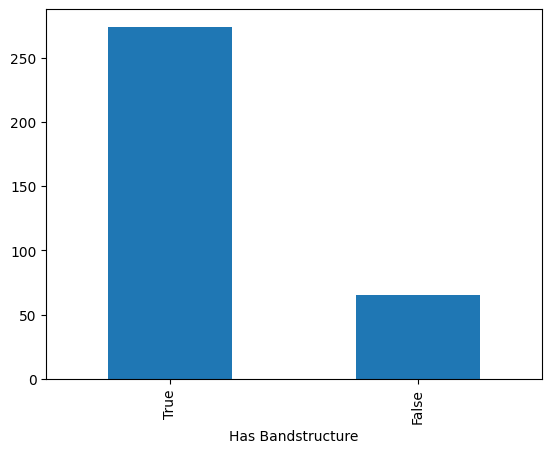

In [22]:
data['Has Bandstructure'].value_counts().plot(kind='bar')

2 unique values, True and False. Classic example of when to use one-hot encoding

In [23]:
# One-hot encode 'Has Bandstructure'
data['Has Bandstructure'] = data['Has Bandstructure'].map({True:1, False:0})

### `'Spacegroup'` column

44


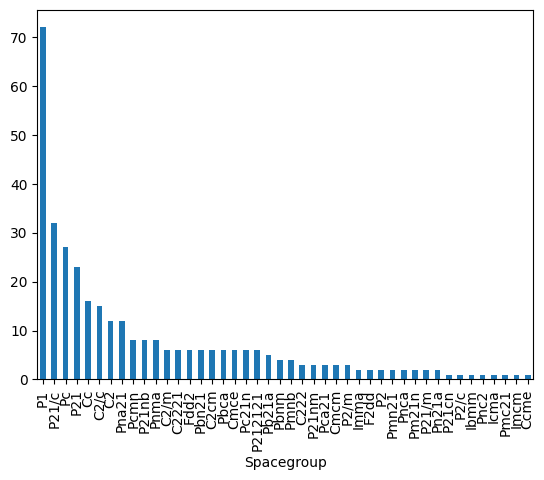

In [24]:
data['Spacegroup'].value_counts().plot(kind='bar')
print(data['Spacegroup'].nunique())

44 unique values, with most of them occuring multiple times

**Option 1:** One-hot encoding will result in 44 new feature columns; inefficient and memory-intensive.

**Option 2:** Encode to ordinal numbers. Will possibly work, but does leave a residual structure that may affect model performance

**Option 3:** Use Feature Hashing to create a vector representation of each unique Spacegroup. Note that if vector size = 44, it's the same as one-hot encoding, and if vector size = 1, it's the same as encoding to ordinal variables. What other vector size might be useful?  3 or 4?

In [25]:
# Option 1: One-hot encoding (not used)
pd.get_dummies(data['Spacegroup'])

,C2,C2/c,C2/m,C222,C2221,C2cm,Cc,Ccme,Cmce,Cmcm,...,Pcmn,Pm21n,Pmc21,Pmn21,Pmnb,Pn21a,Pna21,Pnc2,Pnca,Pnma
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Option 2: Ordinal number encoding
data['Spacegroup (ordinal)'] = pd.factorize(data['Spacegroup'])[0]

# Can also order by most common to least common
data['Spacegroup'].rank(method="dense").astype(int)

,Spacegroup
0,32
1,22
2,7
3,2
4,2
...,...
334,17
335,17
336,17
337,17


In [27]:
# Option 3: Feature Hashing
from sklearn.feature_extraction import FeatureHasher
n = 3
fh = FeatureHasher(n_features=n, input_type='string')

# Convert each string in 'Spacegroup' to a list with one element
# This makes it an iterable of iterables of strings
hashed_tag = fh.fit_transform(data['Spacegroup'].apply(lambda x: [x])).toarray()

ht_df = pd.DataFrame(hashed_tag)
ht_df.columns = ['Spacegroup'+str(i) for i in range(n)]

data = data.join(ht_df)

### `'Formula'` column

In [28]:
data['Formula'].value_counts()

,count
Formula,
LiFeSiO4,42
LiCoSiO4,29
Li2FeSiO4,15
Li2CoSiO4,14
Li2MnSiO4,12
...,...
Li3Co2Si3O10,1
Li10Co(SiO5)2,1
Li4Co2Si3O10,1


114 unique values, most only occuring once. One-hot encoding is out of the question

**Option 1,2,3:** one-hot encoding, ordinal number encoding, and feature hashing all become inefficient with such variety.

**Option 4:** Use domain knowledge to create additional features. For example, we can look at the LiFeSiO4 formula, and turn it into 4 new columns, each one indicating how many of each atom are in the formula (for example, {Li: 1, Fe: 1, Si: 1, O: 4})

In [29]:
# Option 4: use chemparse package to create the new features of atom counts
import chemparse
chem_data = data['Formula'].apply(chemparse.parse_formula)

# Convert the dictionary into a dataframe and fill NaN's with zero's
chem_data = pd.json_normalize(chem_data)
chem_data = chem_data.fillna(0)

data = data.join(chem_data)

### `'Crystal System'` column
This is the target column, and there are 3 different types of crystal structures we're trying to classify. To properly transform this to numerical data, we have to understand if we are working on a multi-class problem or a multi-label problem.

- A multi-class problem is one in which there is only one distinct type of classification for each row. For example, a fruit is either an apple or an orange, but cannot be both. For a multi-class problem, the target value should be a single value, such as a 0 for apple and 1 for orange. In other words, it would be encoded to ordinal numbers.
- A multi-label problem is one in which there are possibly multiple labels for each row. For example, classifying pictures of apples and oranges can include a picture of an apple alone, an orange alone, or both an apple and an orange. For a multi-label problem, the target value should be a vector representation, such as [1,0] for apple, [0,1] for orange, and [1,1] for both apple and orange. In other words, we would have to one-hot encode the target feature.

Since the crystal system structure is unique, this is a multi-class problem. The target output should be encoded to a 0, 1, or 2. If it were a multi-label problem, the target output would have to be encoded to a vector of length 3.

<Axes: xlabel='Crystal System'>

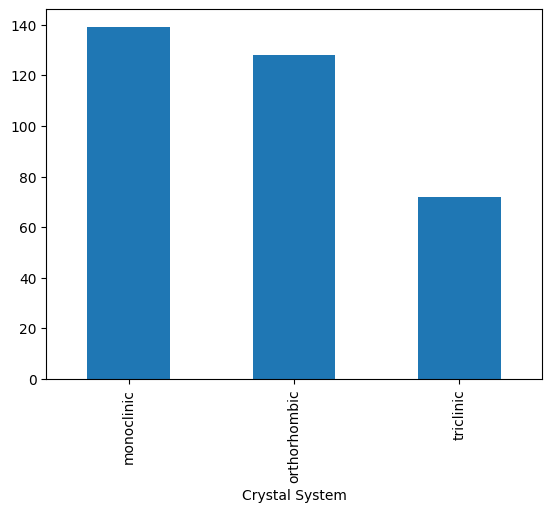

In [30]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

In [31]:
# Encode Crystal System to ordinal values for multi-class problem
data['Crystal System (#)'] = data['Crystal System'].map({'monoclinic':0, 'orthorhombic':1, 'triclinic':2})

### Test performance

In [32]:
# All new numerical features (Crystal System excluded, since it's int32)
features = list(data.select_dtypes(include=['int64','float64']).columns.values)

ord_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
            'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
            'Spacegroup (ordinal)','Li','Mn','Si','O','Fe','Co'
           ]

hash_feat = ['Formation Energy (eV)','E Above Hull (eV)','Band Gap (eV)',
             'Nsites','Density (gm/cc)','Volume','Has Bandstructure',
             'Spacegroup0','Spacegroup1','Spacegroup2',
             'Li','Mn','Si','O','Fe','Co'
            ]

labels = ['Crystal System (#)']

In [33]:
titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])


In [34]:
print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.544118 |          0.525734 |          0.544118 |       0.535985 |       0.544118 |   0.527652 |   0.544118 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   1        |          1        |          1        |       1        |       1        |   1        |   1        |
| (Ordinal Spacegroup)             |            |                   |                   |           

Want to check the accuracy of each class? We can use the confusion matrix to show the results.

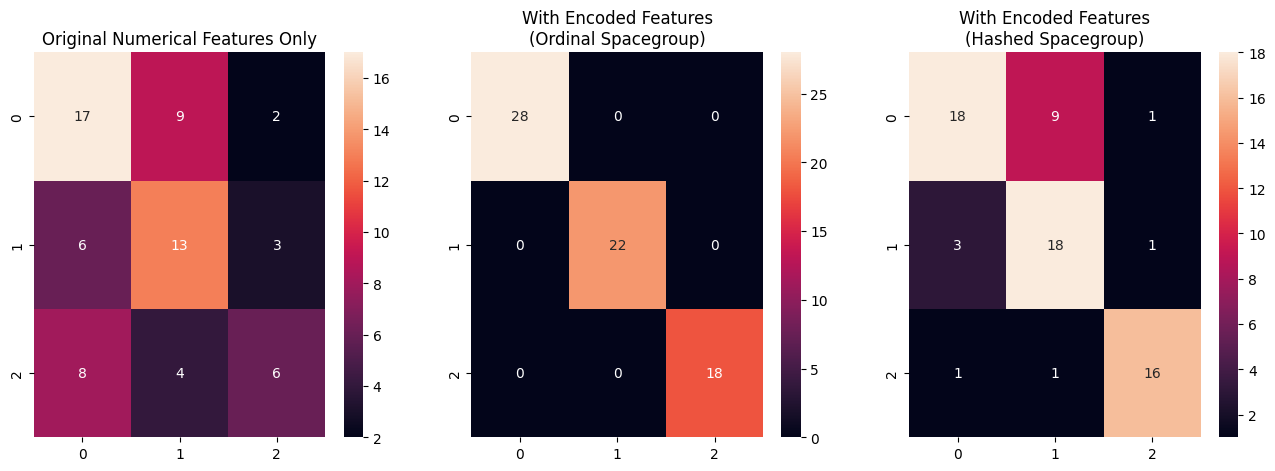

In [36]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

## **Question 5** **(10 points)**

Based on the above metrics table and confusion matrix, which feature engineering technique performs best and why?


In [ ]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

## **Question 6** **(15 points)**
Try two different methods such as `linear_model.LogisticRegression`, `neighbors.KNeighborsClassifier` or `ensemble.RandomForestClassifier`. Report your results.
Can you achieve better performance than any of the previous models? Why do these methods perform better/worse than the decision tree?





In [37]:
'''
Hint:
from sklearn.linear_model import LogisticRegression
for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]
    #80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

    # change to your selected model
    model = LogisticRegression(max_iter=10000)


    model.fit(Xtrain,ytrain)
    yp = model.predict(Xtest)
'''

'\nHint:\nfrom sklearn.linear_model import LogisticRegression\nfor i, feat in enumerate([num_feat,ord_feat,hash_feat]):\n    X = data[feat]\n    y = data[labels]\n    #80% training data and 20% testing\n    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)\n\n    # change to your selected model\n    model = LogisticRegression(max_iter=10000)\n\n\n    model.fit(Xtrain,ytrain)\n    yp = model.predict(Xtest)\n'

In [ ]:
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here

# Solution with Feature Engineering + rebalance dataset

![](https://media.makeameme.org/created/today-rebalance.jpg)

Let's review the distribution of `Crystal System` again. It is clear that the three class is unbalanced. Dealing with imbalanced data is common in classification problems because such imbalance usually affects the performance of the model.

<Axes: xlabel='Crystal System'>

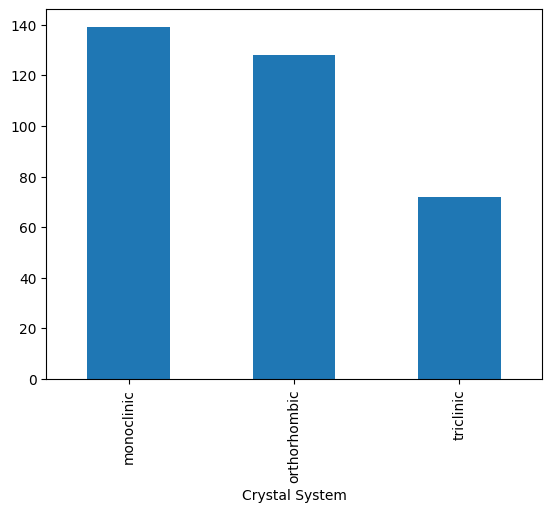

In [38]:
# Check for balance
data['Crystal System'].value_counts().plot(kind='bar')

Here, we use apply undersampling to `monoclinic` and `orthorhombic` so that they have the same number as `triclinic`.

In [41]:
import pandas as pd

monoclinic_data = data[data['Crystal System'] == 'monoclinic']
orthorhombic_data = data[data['Crystal System'] == 'orthorhombic']
triclinic_data = data[data['Crystal System'] == 'triclinic']

monoclinic_data_sampled = monoclinic_data.sample(n=len(triclinic_data))
orthorhombic_data_sampled = orthorhombic_data.sample(n=len(triclinic_data))

# Use pd.concat instead of append
data_rebalanced = pd.concat([triclinic_data, monoclinic_data_sampled, orthorhombic_data_sampled]).reset_index(drop=True)

<Axes: xlabel='Crystal System'>

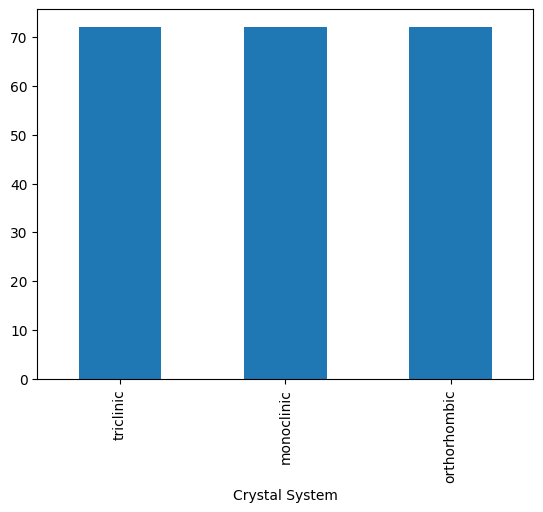

In [42]:
# Check for balance
data_rebalanced['Crystal System'].value_counts().plot(kind='bar')

Now that the dataset has been rebalanced, let's see if this affects the performance of the model.

## **Question 7** **(15 points)**
Redo the calculations, using the above `data_rebalanced` dataset. Report results and compare the results with the original(imbalance) dataset. Will rebalancing the data improve performance? Why?





In [43]:
'''
Hint:

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):

    # change to rebalanced dataset: data_rebalanced
    X = data_rebalanced[feat]
    y = data_rebalanced[labels]


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

'''

'\nHint:\n\nfor i, feat in enumerate([num_feat,ord_feat,hash_feat]):\n\n    # change to rebalanced dataset: data_rebalanced\n    X = data_rebalanced[feat]\n    y = data_rebalanced[labels]\n\n\n    # 80% training data and 20% testing\n    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)\n    dtree = DecisionTreeClassifier()\n    dtree.fit(Xtrain,ytrain)\n    yp = dtree.predict(Xtest)\n\n'

In [ ]:
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here

# Solution with Feature Engineering + dimensionality reduction

![](https://i.ytimg.com/vi/hSDinYYObd4/maxresdefault.jpg)

Remember the mysterious technology Principal Component Analysis (PCA) that was mentioned the lecture? Forgotten? Go review it, because it may appear on your midterm/final exam. 👀

Now, let's see how PCA works in the classification task.
PCA performs better with a normalized feature set. We will perform standard scalar normalization to normalize our feature set first using `StandardScaler` and then apply `PCA`.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| features                         |   accuracy |   macro_precision |   micro_precision |   macro_recall |   micro_recall |   macro_f1 |   micro_f1 |
+==================================+============+===================+===================+================+================+============+============+
| Original Numerical Features Only |   0.544118 |          0.568783 |          0.544118 |       0.563235 |       0.544118 |   0.561912 |   0.544118 |
+----------------------------------+------------+-------------------+-------------------+----------------+----------------+------------+------------+
| With Encoded Features            |   0.705882 |          0.712722 |          0.705882 |       0.705996 |       0.705882 |   0.708475 |   0.705882 |
| (Ordinal Spacegroup)             |            |                   |                   |           

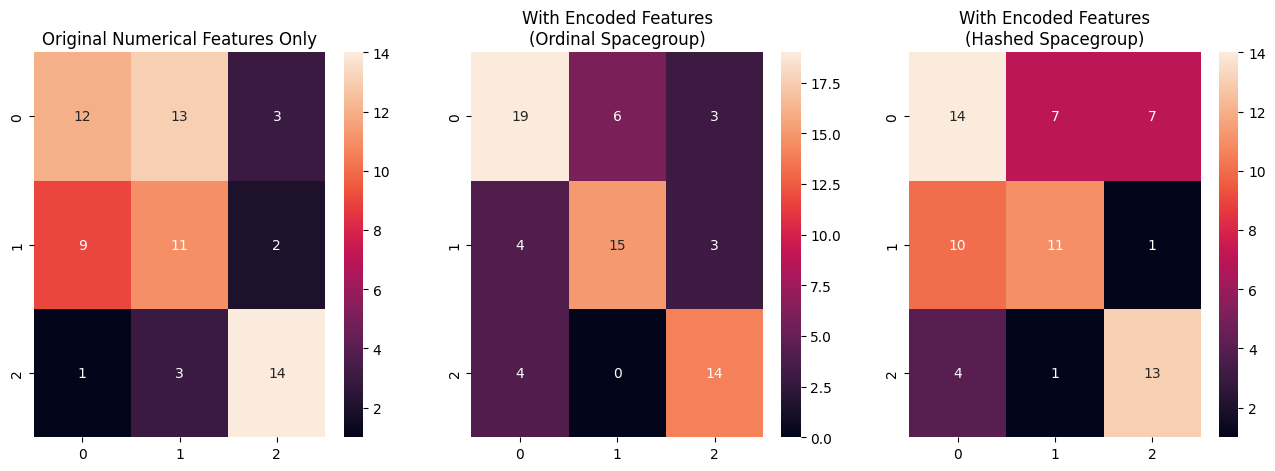

In [45]:
plt.figure(figsize=(16,5))

titles = ['Original Numerical Features Only',
          'With Encoded Features\n(Ordinal Spacegroup)',
          'With Encoded Features\n(Hashed Spacegroup)'
         ]

results=[]

for i, feat in enumerate([num_feat,ord_feat,hash_feat]):
    X = data[feat]
    y = data[labels]

    #
    sc = StandardScaler()
    pca = PCA(n_components=4)  # adjust the number of principal component here
    X = sc.fit_transform(X)
    X = pca.fit_transform(X)


    # 80% training data and 20% testing
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)
    dtree = DecisionTreeClassifier()
    dtree.fit(Xtrain,ytrain)
    yp = dtree.predict(Xtest)

    accuracy=accuracy_score(yp,ytest)

    macro_precision=precision_score(yp,ytest,average='macro')
    micro_precision=precision_score(yp,ytest,average='micro')

    macro_recall=recall_score(yp,ytest,average='macro')
    micro_recall=recall_score(yp,ytest,average='micro')

    macro_f1=f1_score(yp,ytest,average='macro')
    micro_f1=f1_score(yp,ytest,average='micro')

    results.append([titles[i],accuracy,macro_precision,micro_precision,macro_recall,micro_recall,macro_f1,micro_f1])

    plt.subplot(1,3,i+1)
    cm = confusion_matrix(ytest,yp)
    sns.heatmap(cm,annot=True)
    plt.title(titles[i])

print (tabulate(results, headers=["features", "accuracy", "macro_precision", "micro_precision", "macro_recall", "micro_recall", "macro_f1", "micro_f1"],tablefmt="grid"))

## **Question 8** **(15 points)**

**Part 1 (5 points)**

How does PCA perform dimensionality reduction? Is it valid for numerical variables? Why? Is it valid for ordinal variable? Why? Is it valid for categorical variable? Why?

**Part 2 (10 points)**

Try different numbers of principal components (eg. `n_components=1,2,3,4`) on different methods (eg. `LogisticRegression`, `KNeighborsClassifier` or `naive_bayes` ), and report the results.

Does the classification effect increase as the number of principal components increases? Why?


In [ ]:
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here
# Your code and answer here

## **Question 9**  **(Extra credit: 10 points... Note: the maximum score you can get on this homework is 100%)**


Play around with doing a better analysis.  Things to try:

1.   This problem is easier than Case Study 1 in that you seem to have enough data to do a good job.  Can you make the problem harder and still do well?  E.g., if you make your training data smaller and smaller then is there some limit where you don't do well anymore?  This tells you how many experiments you need!
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different dimensionality reduction methods (other than PCA). Here are several examples in Sci-kit learn (https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html?highlight=manifold%20learning). Do any work better than others?

